# WeatherPy

### Import Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})
weather_df

print("""
--------------------------------------------------------------------------------
                            Beginning Data Retrieval
--------------------------------------------------------------------------------
""")

count = 1
for i in range(len(cities)):
    try:
        query_url = f"{base_url}appid={api_keys.api_key}&q={cities[i]}&units=imperial"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        response = requests.get(query_url)
        weather_json = response.json()
        
        city_country = weather_json["sys"]["country"]
        city_latitude = weather_json["coord"]["lat"]
        city_longitude = weather_json["coord"]["lon"]
        city_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        city_max_temperature = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_windspeed = weather_json["wind"]["speed"]
        city_cloud = weather_json["clouds"]["all"]
        
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":city_country,
            "Latitude":city_latitude,
            "Longitude":city_longitude,
            "Date":city_date,
            "Temperature":city_max_temperature, 
            "Humidity":city_humidity,
            "Wind Speed":city_windspeed,
            "Clouds":city_cloud
        }, ignore_index=True)
        
        count+=1
        
    except:
        print("Insufficient data. Skipping..")
print("""
--------------------------------------------------------------------------------
                                Data Retrieval Complete
--------------------------------------------------------------------------------
""")


--------------------------------------------------------------------------------
                            Beginning Data Retrieval
--------------------------------------------------------------------------------

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | andenes
Insufficient data. Skipping..
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | payo
Processing Record 4 of Set 1 | hay river
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | litovko
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | rio gallegos
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | mys shmidta
Insufficient data. Skipping..
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | kuna
Processing Record 15 of Set 1 | smithers
Processing

Processing Record 165 of Set 1 | picota
Processing Record 166 of Set 1 | yangjiang
Processing Record 167 of Set 1 | ostrovnoy
Processing Record 168 of Set 1 | lompoc
Processing Record 169 of Set 1 | olinda
Processing Record 170 of Set 1 | birjand
Processing Record 171 of Set 1 | lolua
Insufficient data. Skipping..
Processing Record 171 of Set 1 | batagay-alyta
Processing Record 172 of Set 1 | mongoumba
Processing Record 173 of Set 1 | pran buri
Processing Record 174 of Set 1 | togur
Processing Record 175 of Set 1 | ngukurr
Insufficient data. Skipping..
Processing Record 175 of Set 1 | belmonte
Processing Record 176 of Set 1 | grand forks
Processing Record 177 of Set 1 | saldanha
Processing Record 178 of Set 1 | nouakchott
Processing Record 179 of Set 1 | kamphaeng phet
Processing Record 180 of Set 1 | kulhudhuffushi
Processing Record 181 of Set 1 | aksu
Processing Record 182 of Set 1 | mahebourg
Processing Record 183 of Set 1 | berdigestyakh
Processing Record 184 of Set 1 | konstantino

Processing Record 327 of Set 1 | bara
Processing Record 328 of Set 1 | gambela
Processing Record 329 of Set 1 | noumea
Processing Record 330 of Set 1 | hasaki
Processing Record 331 of Set 1 | brownfield
Processing Record 332 of Set 1 | kitimat
Processing Record 333 of Set 1 | mpraeso
Processing Record 334 of Set 1 | laurentides
Processing Record 335 of Set 1 | siocon
Processing Record 336 of Set 1 | tsihombe
Insufficient data. Skipping..
Processing Record 336 of Set 1 | lawrenceburg
Processing Record 337 of Set 1 | otradnoye
Processing Record 338 of Set 1 | palmer
Processing Record 339 of Set 1 | harper
Processing Record 340 of Set 1 | morros
Processing Record 341 of Set 1 | sisimiut
Processing Record 342 of Set 1 | kommunisticheskiy
Processing Record 343 of Set 1 | chumikan
Processing Record 344 of Set 1 | upernavik
Processing Record 345 of Set 1 | praya
Processing Record 346 of Set 1 | riviere-au-renard
Processing Record 347 of Set 1 | orotukan
Processing Record 348 of Set 1 | muravl

Processing Record 498 of Set 1 | zhob
Processing Record 499 of Set 1 | atar
Processing Record 500 of Set 1 | champerico
Processing Record 501 of Set 1 | kamaishi
Processing Record 502 of Set 1 | wuwei
Processing Record 503 of Set 1 | heihe
Processing Record 504 of Set 1 | chara
Processing Record 505 of Set 1 | vila
Processing Record 506 of Set 1 | zaysan
Processing Record 507 of Set 1 | antsirabe
Processing Record 508 of Set 1 | nyimba
Processing Record 509 of Set 1 | killybegs
Processing Record 510 of Set 1 | antalaha
Processing Record 511 of Set 1 | kavaratti
Processing Record 512 of Set 1 | lagoa
Processing Record 513 of Set 1 | manicore
Processing Record 514 of Set 1 | trairi
Processing Record 515 of Set 1 | sergeyevka
Processing Record 516 of Set 1 | gonda
Processing Record 517 of Set 1 | mahadday weyne
Insufficient data. Skipping..
Processing Record 517 of Set 1 | formosa
Processing Record 518 of Set 1 | angoram
Processing Record 519 of Set 1 | high river
Processing Record 520 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Display the DataFrame
weather_df

,City Name,Country,Latitude,Longitude,Date,Temperature,Humidity,Wind Speed,Clouds
0,new norfolk,AU,-42.78,147.06,2019-04-20,71.60,49.0,14.99,20.0
1,ushuaia,AR,-54.81,-68.31,2019-04-20,42.80,81.0,28.86,75.0
2,payo,ID,-3.75,103.64,2019-04-20,88.82,46.0,3.27,91.0
3,hay river,CA,60.82,-115.79,2019-04-20,32.00,91.0,5.82,90.0
4,hilo,US,19.71,-155.08,2019-04-20,75.00,83.0,14.36,40.0
5,los llanos de aridane,ES,28.66,-17.92,2019-04-20,64.40,68.0,10.29,75.0
6,litovko,RU,49.24,135.18,2019-04-20,49.58,34.0,6.35,14.0
7,puerto ayora,EC,-0.74,-90.35,2019-04-20,78.74,85.0,6.91,70.0
8,butaritari,KI,3.07,172.79,2019-04-20,82.88,75.0,14.47,100.0
9,kruisfontein,ZA,-34.00,24.73,2019-04-20,59.84,83.0,10.63,18.0


In [5]:
# Export to CSV
weather_df.to_csv(r'cities.csv')

In [6]:
# Describe DataFrame
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Wind Speed,Clouds
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,20.594513,16.068446,60.392378,69.601124,7.915337,49.833333
std,33.534124,93.848891,21.783143,22.608506,5.617576,38.341415
min,-54.810000,-179.170000,-19.190000,8.000000,0.450000,0.000000
25%,-7.915000,-68.467500,45.110000,56.000000,3.390000,6.000000
50%,25.505000,17.075000,62.600000,75.000000,6.710000,47.500000
75%,49.225000,107.662500,77.000000,87.000000,10.842500,90.000000
max,78.220000,179.320000,109.520000,100.000000,43.620000,100.000000


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

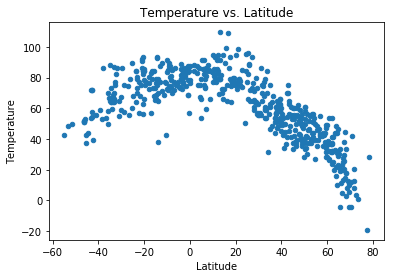

In [7]:
lat_tmp_plt = weather_df.plot.scatter(x='Latitude', y='Temperature', title='Temperature vs. Latitude')

plt.savefig('Images/Temperature vs Latitude.png')

#### Latitude vs. Humidity Plot

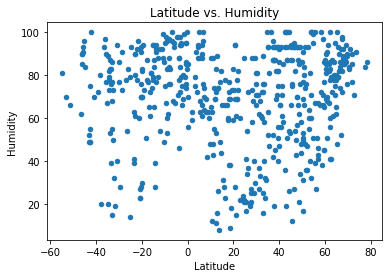

In [8]:
lat_hum_plt = weather_df.plot.scatter(x='Latitude', y='Humidity', title='Latitude vs. Humidity')

plt.savefig('Images/Latitude vs. Humidity.png')

#### Latitude vs. Cloudiness Plot

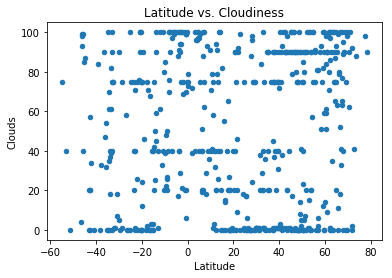

In [9]:
lat_cld_plt = weather_df.plot.scatter(x='Latitude', y='Clouds', title='Latitude vs. Cloudiness')

plt.savefig('Images/Latitude vs. Cloudiness.png')

#### Latitude vs. Wind Speed Plot

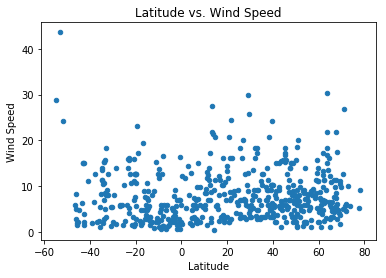

In [10]:
lat_wspeed_plt = weather_df.plot.scatter(x='Latitude', y='Wind Speed', title='Latitude vs. Wind Speed')

plt.savefig('Images/Latitude vs. Wind Speed.png')

### Three Observable Trends

#### Analysis:

* According to the Latitude vs. Temperature plot, countries with lower latitudes are hotter i.e. higher in Farenheit
    
* We observe the highest humidity levels at the Equator which has a latitude of 0 since there is a high concentration of points in the Latitude vs. Humidity scatterplot at Latitude 0.
    
* Windspeeds are highest at the higher latitudes as observed in the Latitude vs. Windspeed scatterplot. 